**PREDICTING STOCK PRICE OF TESLA(THAT IS UPWARD AND DOWNWARD TREND) WITH THE HELP OF STACKED LSTM(SINCE MULTIPLE LAYERS OF LSTM ARE USED).**

**HERE FROM MANY DATESETS I HAVE USED DATASET FOR TESLA STOCKS**

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [5]:
#importing dataset
ds = pd.read_csv(r"Stocks/tsla.us.txt")
ds.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [6]:
ds.shape

(1858, 7)

In [7]:
#splitting dataset into test and train dataset
train_ds, test_ds = ds[0:int(len(ds)*0.80)],ds[int(len(ds)*0.80):len(ds)]

In [8]:
#defining training set taking column 'open'
train_set = train_ds.iloc[:,1:2].values
train_set

array([[ 17.  ],
       [ 19.  ],
       [ 25.79],
       ...,
       [213.62],
       [216.99],
       [219.87]])

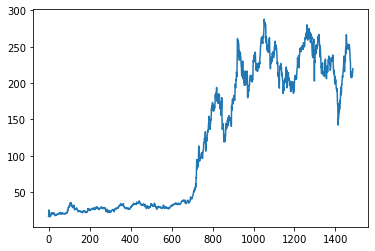

In [9]:
plt.plot(train_set)

In [10]:
#applying feature scaling,Normalization is preferred in RNN
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
scaled_train_set = sc.fit_transform(train_set)

In [11]:
#creating a data structure with 60 timestamps and 1 output
x_train = []
y_train = []

#values can be changed but i got best results with 60 timestamps
for i in range(60,len(train_set)):
    x_train.append(scaled_train_set[i-60:i,0])
    y_train.append(scaled_train_set[i,0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

**HERE 60 IS TAKEN BECAUSE IN ORDER FOR LSTM TO WORK WE REQUIRE SOME PRIOR KNOWLEDGE,** 

**HENCE FOR STOCK PRICE AT TIME (T)** 
* **WE REQUIRE KNOWLEDGE PREVIOUS 60 STOCKS** 
* **TO PREDICT THE STOCK AT TIME (T+1)**

In [12]:
#reshaping x_train for inputting in RNN
#here reshape(batch_size,timesteps,input_dim)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)

In [15]:
#building the RNN
rnn = keras.models.Sequential()

#adding first layer of LSTM
rnn.add(keras.layers.LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
rnn.add(keras.layers.Dropout(0.2))

#adding second layer of LSTM
rnn.add(keras.layers.LSTM(units = 50,return_sequences = True))
rnn.add(keras.layers.Dropout(0.2))

#adding third layer of LSTM
rnn.add(keras.layers.LSTM(units = 50,return_sequences = True))
rnn.add(keras.layers.Dropout(0.2))

#adding fourth layer of LSTM
rnn.add(keras.layers.LSTM(units = 50))
rnn.add(keras.layers.Dropout(0.2))
        
#adding output layer of LSTM
rnn.add(keras.layers.Dense(units = 1))

#compiling the model
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')
        
#training the model
rnn.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
45/45 [==============================] - 4s 92ms/step - loss: 0.0298
Epoch 2/50
45/45 [==============================] - 5s 101ms/step - loss: 0.0070
Epoch 3/50
45/45 [==============================] - 5s 109ms/step - loss: 0.0060
Epoch 4/50
45/45 [==============================] - 5s 101ms/step - loss: 0.0057
Epoch 5/50
45/45 [==============================] - 5s 100ms/step - loss: 0.0053
Epoch 6/50
45/45 [==============================] - 4s 93ms/step - loss: 0.0052
Epoch 7/50
45/45 [==============================] - 4s 93ms/step - loss: 0.0044
Epoch 8/50
45/45 [==============================] - 4s 94ms/step - loss: 0.0047
Epoch 9/50
45/45 [==============================] - 5s 112ms/step - loss: 0.0038
Epoch 10/50
45/45 [==============================] - 4s 95ms/step - loss: 0.0040
Epoch 11/50
45/45 [==============================] - 4s 94ms/step - loss: 0.0043
Epoch 12/50
45/45 [==============================] - 4s 95ms/step - loss: 0.0041
Epoch 13/50
45/45 [=============

In [16]:
#defining y_test(actual values)
y_test = test_ds.iloc[:,1:2].values

In [17]:
#inputs contain 60 previous values of the first element of test_ds
#bcause for prediction of first values of test_ds we need 60 prior values
ds_total = pd.concat((train_ds["Open"], test_ds["Open"]), axis = 0)
inputs = ds_total[(len(ds_total) - len(test_ds) - 60):].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [18]:
#creating a x_test 
x_test = []

for i in range(60,432):
    x_test.append(inputs[i-60:i,0])
    
x_test = np.array(x_test)

In [19]:
#reshaping x_test for prediction
#here reshape(batch_size,timesteps,input_dim)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
y_pred = rnn.predict(x_test)
y_pred = sc.inverse_transform(y_pred)

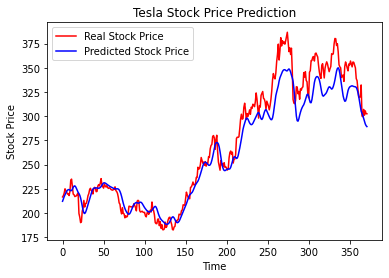

In [20]:
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()